In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


df = pd.read_csv(r"C:\Users\user\projects\customer_behaviour_dataset\Customer_Segmentation\Raw Data\Ecommerce_Consumer_Behavior_Analysis_Data.csv")
df

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20-562-2569,44,Female,High,Divorced,Bachelor's,High,Aramayuan,Mobile Accessories,$463.67,...,4,NaN,Tablet,PayPal,7/7/2024,True,False,Need-based,Standard,5
996,41-366-4205,50,Female,High,Single,High School,Middle,Paquera,Gardening & Outdoors,$69.78,...,6,Low,Tablet,Cash,3/28/2024,True,False,Wants-based,No Preference,9
997,77-241-7621,26,Male,High,Married,Bachelor's,High,Warudoyong,Food & Beverages,$453.37,...,6,High,Desktop,Credit Card,3/11/2024,True,True,Wants-based,Express,9
998,53-091-2176,21,Female,High,Widowed,Bachelor's,Middle,Béziers,Baby Products,$106.15,...,5,Medium,Desktop,Cash,3/30/2024,True,True,Impulsive,Standard,8


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

In [178]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Marital_Status',
       'Education_Level', 'Occupation', 'Location', 'Purchase_Category',
       'Purchase_Amount', 'Frequency_of_Purchase', 'Purchase_Channel',
       'Brand_Loyalty', 'Product_Rating',
       'Time_Spent_on_Product_Research(hours)', 'Social_Media_Influence',
       'Discount_Sensitivity', 'Return_Rate', 'Customer_Satisfaction',
       'Engagement_with_Ads', 'Device_Used_for_Shopping', 'Payment_Method',
       'Time_of_Purchase', 'Discount_Used', 'Customer_Loyalty_Program_Member',
       'Purchase_Intent', 'Shipping_Preference', 'Time_to_Decision'],
      dtype='object')

In [179]:
# Remove $ and convert to float
df['Purchase_Amount'] = df['Purchase_Amount'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\user\AppData\Local\Temp\ipykernel_25356\3333458580.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Purchase_Amount'] = df['Purchase_Amount'].replace('[\$,]', '', regex=True).astype(float)


In [180]:
# Count NaN values per column
na_count = df.isna().sum()

#Replace 2 columns with NaN
df['Social_Media_Influence'] = df['Social_Media_Influence'].fillna('Unknown')
df['Engagement_with_Ads'] = df['Engagement_with_Ads'].fillna('Unknown')

In [181]:
df.isna().sum()

Customer_ID                              0
Age                                      0
Gender                                   0
Income_Level                             0
Marital_Status                           0
Education_Level                          0
Occupation                               0
Location                                 0
Purchase_Category                        0
Purchase_Amount                          0
Frequency_of_Purchase                    0
Purchase_Channel                         0
Brand_Loyalty                            0
Product_Rating                           0
Time_Spent_on_Product_Research(hours)    0
Social_Media_Influence                   0
Discount_Sensitivity                     0
Return_Rate                              0
Customer_Satisfaction                    0
Engagement_with_Ads                      0
Device_Used_for_Shopping                 0
Payment_Method                           0
Time_of_Purchase                         0
Discount_Us

In [182]:
# Example ordinal mappings
df['Discount_Sensitivity'] = df['Discount_Sensitivity'].map({
    'Not Sensitive':0, 'Somewhat Sensitive':1, 'Very Sensitive':2
})


In [183]:
# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Print number of unique categories for each categorical column
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique categories")


Customer_ID: 1000 unique categories
Gender: 8 unique categories
Income_Level: 2 unique categories
Marital_Status: 4 unique categories
Education_Level: 3 unique categories
Occupation: 2 unique categories
Location: 969 unique categories
Purchase_Category: 24 unique categories
Purchase_Channel: 3 unique categories
Social_Media_Influence: 4 unique categories
Engagement_with_Ads: 4 unique categories
Device_Used_for_Shopping: 3 unique categories
Payment_Method: 5 unique categories
Time_of_Purchase: 344 unique categories
Purchase_Intent: 4 unique categories
Shipping_Preference: 3 unique categories


In [184]:
df['Income_Level'].unique()

array(['Middle', 'High'], dtype=object)

In [185]:
df['Discount_Sensitivity'].unique()

array([1, 0, 2])

In [186]:
# Encode binary categories
binary_mapping = {'Middle': 0, 'High': 1}
df['Income_Level'] = df['Income_Level'].map(binary_mapping)
df['Occupation'] = df['Occupation'].map(binary_mapping)

In [187]:
# Example: 3 bins - Low, Medium, High
df['Purchase_Amount_Bin'] = pd.qcut(df['Purchase_Amount'], q=3, labels=['Low', 'Medium', 'High'])
bin_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Purchase_Amount_Bin'] = df['Purchase_Amount_Bin'].map(bin_mapping)


In [188]:
# Boolean columns
df['Discount_Used'] = df['Discount_Used'].astype(int)
df['Customer_Loyalty_Program_Member'] = df['Customer_Loyalty_Program_Member'].astype(int)

In [189]:
# Map ordinal features
df['Social_Media_Influence'] = df['Social_Media_Influence'].map({'Unknown':0, 'Low':1, 'Medium':2, 'High':3})
#df['Discount_Sensitivity'] = df['Discount_Sensitivity'].map({'Not Sensitive':0, 'Somewhat Sensitive':1, 'Very Sensitive':2})
df['Engagement_with_Ads'] = df['Engagement_with_Ads'].map({'Unknown':0, 'Low':1, 'Medium':2, 'High':3})


In [190]:
nominal_cols = ['Gender', 'Marital_Status', 'Education_Level', 'Purchase_Channel','Time_Spent_on_Product_Research(hours)',
                'Device_Used_for_Shopping', 'Payment_Method', 'Purchase_Intent', 'Shipping_Preference']

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)


In [191]:
numeric_cols = ['Age', 'Frequency_of_Purchase', 'Brand_Loyalty', 'Product_Rating',
                'Return_Rate', 'Customer_Satisfaction', 
                'Time_to_Decision', 'Purchase_Amount_Bin']

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [192]:
df

,Customer_ID,Age,Income_Level,Occupation,Location,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Brand_Loyalty,Product_Rating,...,Device_Used_for_Shopping_Tablet,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Other,Payment_Method_PayPal,Purchase_Intent_Need-based,Purchase_Intent_Planned,Purchase_Intent_Wants-based,Shipping_Preference_No Preference,Shipping_Preference_Standard
0,37-611-6911,-1.316138,0,0,Évry,Gardening & Outdoors,333.80,-0.936173,1.393975,1.369839,...,True,True,False,False,False,True,False,False,True,False
1,29-392-9296,1.572007,1,1,Huocheng,Food & Beverages,222.22,1.289026,-0.018360,-1.415802,...,True,False,False,False,True,False,False,True,False,True
2,84-649-5117,-1.102202,0,1,Huzhen,Office Supplies,426.22,-1.571944,1.393975,1.369839,...,False,False,True,False,False,False,False,False,True,False
3,48-980-6078,-0.567360,0,0,Wiwilí,Home Appliances,101.31,-0.300402,-0.018360,-1.415802,...,False,False,False,True,False,True,False,False,False,False
4,91-170-9072,-0.139487,0,0,Nara,Furniture,211.70,-0.300402,-0.018360,0.673429,...,False,False,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20-562-2569,1.037165,1,1,Aramayuan,Mobile Accessories,463.67,-0.618287,-0.724528,0.673429,...,True,False,False,False,True,True,False,False,False,True
996,41-366-4205,1.678975,1,0,Paquera,Gardening & Outdoors,69.78,0.653255,0.687807,-0.022982,...,True,False,False,False,False,False,False,True,True,False
997,77-241-7621,-0.888265,1,1,Warudoyong,Food & Beverages,453.37,0.971140,-1.430695,-1.415802,...,False,True,False,False,False,False,False,True,False,False
998,53-091-2176,-1.423107,1,0,Béziers,Baby Products,106.15,1.606911,0.687807,0.673429,...,False,False,False,False,False,False,False,False,False,True


In [193]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [194]:
df.drop(columns=['Customer_ID', 'Purchase_Amount', 'Time_of_Purchase','Location','Purchase_Category'], inplace=True)


In [195]:
# Count NaN values per column
na_count = df.isna().sum()
na_count

Age                                           0
Income_Level                                  0
Occupation                                    0
Frequency_of_Purchase                         0
Brand_Loyalty                                 0
Product_Rating                                0
Social_Media_Influence                        0
Discount_Sensitivity                          0
Return_Rate                                   0
Customer_Satisfaction                         0
Engagement_with_Ads                           0
Discount_Used                                 0
Customer_Loyalty_Program_Member               0
Time_to_Decision                              0
Purchase_Amount_Bin                           0
Gender_Bigender                               0
Gender_Female                                 0
Gender_Genderfluid                            0
Gender_Genderqueer                            0
Gender_Male                                   0
Gender_Non-binary                       

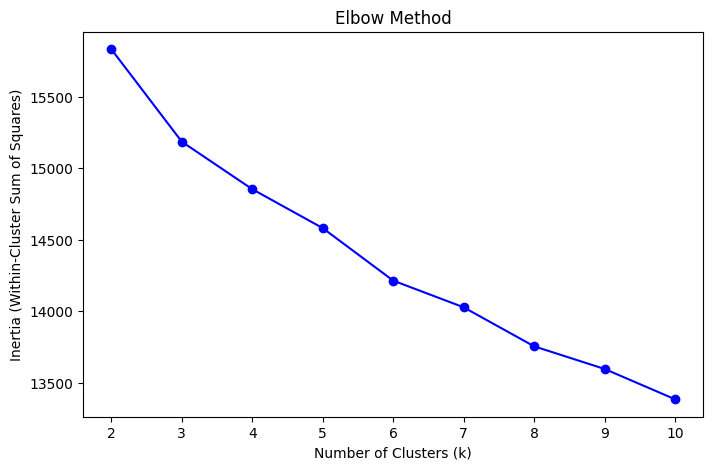

In [196]:
inertia = []
K = range(2, 11)  # test k from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()


In [197]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    print(f"Silhouette Score for k={k}: {score:.3f}")


Silhouette Score for k=2: 0.059
Silhouette Score for k=3: 0.051
Silhouette Score for k=4: 0.045
Silhouette Score for k=5: 0.040
Silhouette Score for k=6: 0.044
Silhouette Score for k=7: 0.041
Silhouette Score for k=8: 0.043
Silhouette Score for k=9: 0.043
Silhouette Score for k=10: 0.044
